In [1]:
import tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("bank.csv")

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
data.shape

(11162, 17)

In [8]:
for i in data.columns:
    print(f"{i}:",data[i].unique())

age: [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
job: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'primary' 'unknown']
default: ['no' 'yes']
balance: [2343   45 1270 ... 1594 2593 -134]
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [1042 1467 1389 ... 1504  818 1812]
campaign: [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
pdays: [ 

In [9]:
for i in data.columns:
    print(data[i].value_counts())

age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: count, Length: 76, dtype: int64
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
balance
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: count, Length: 3805, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int

In [10]:
data["deposit"]=data["deposit"].map({"yes":1,"no":0})

C:\Users\ines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

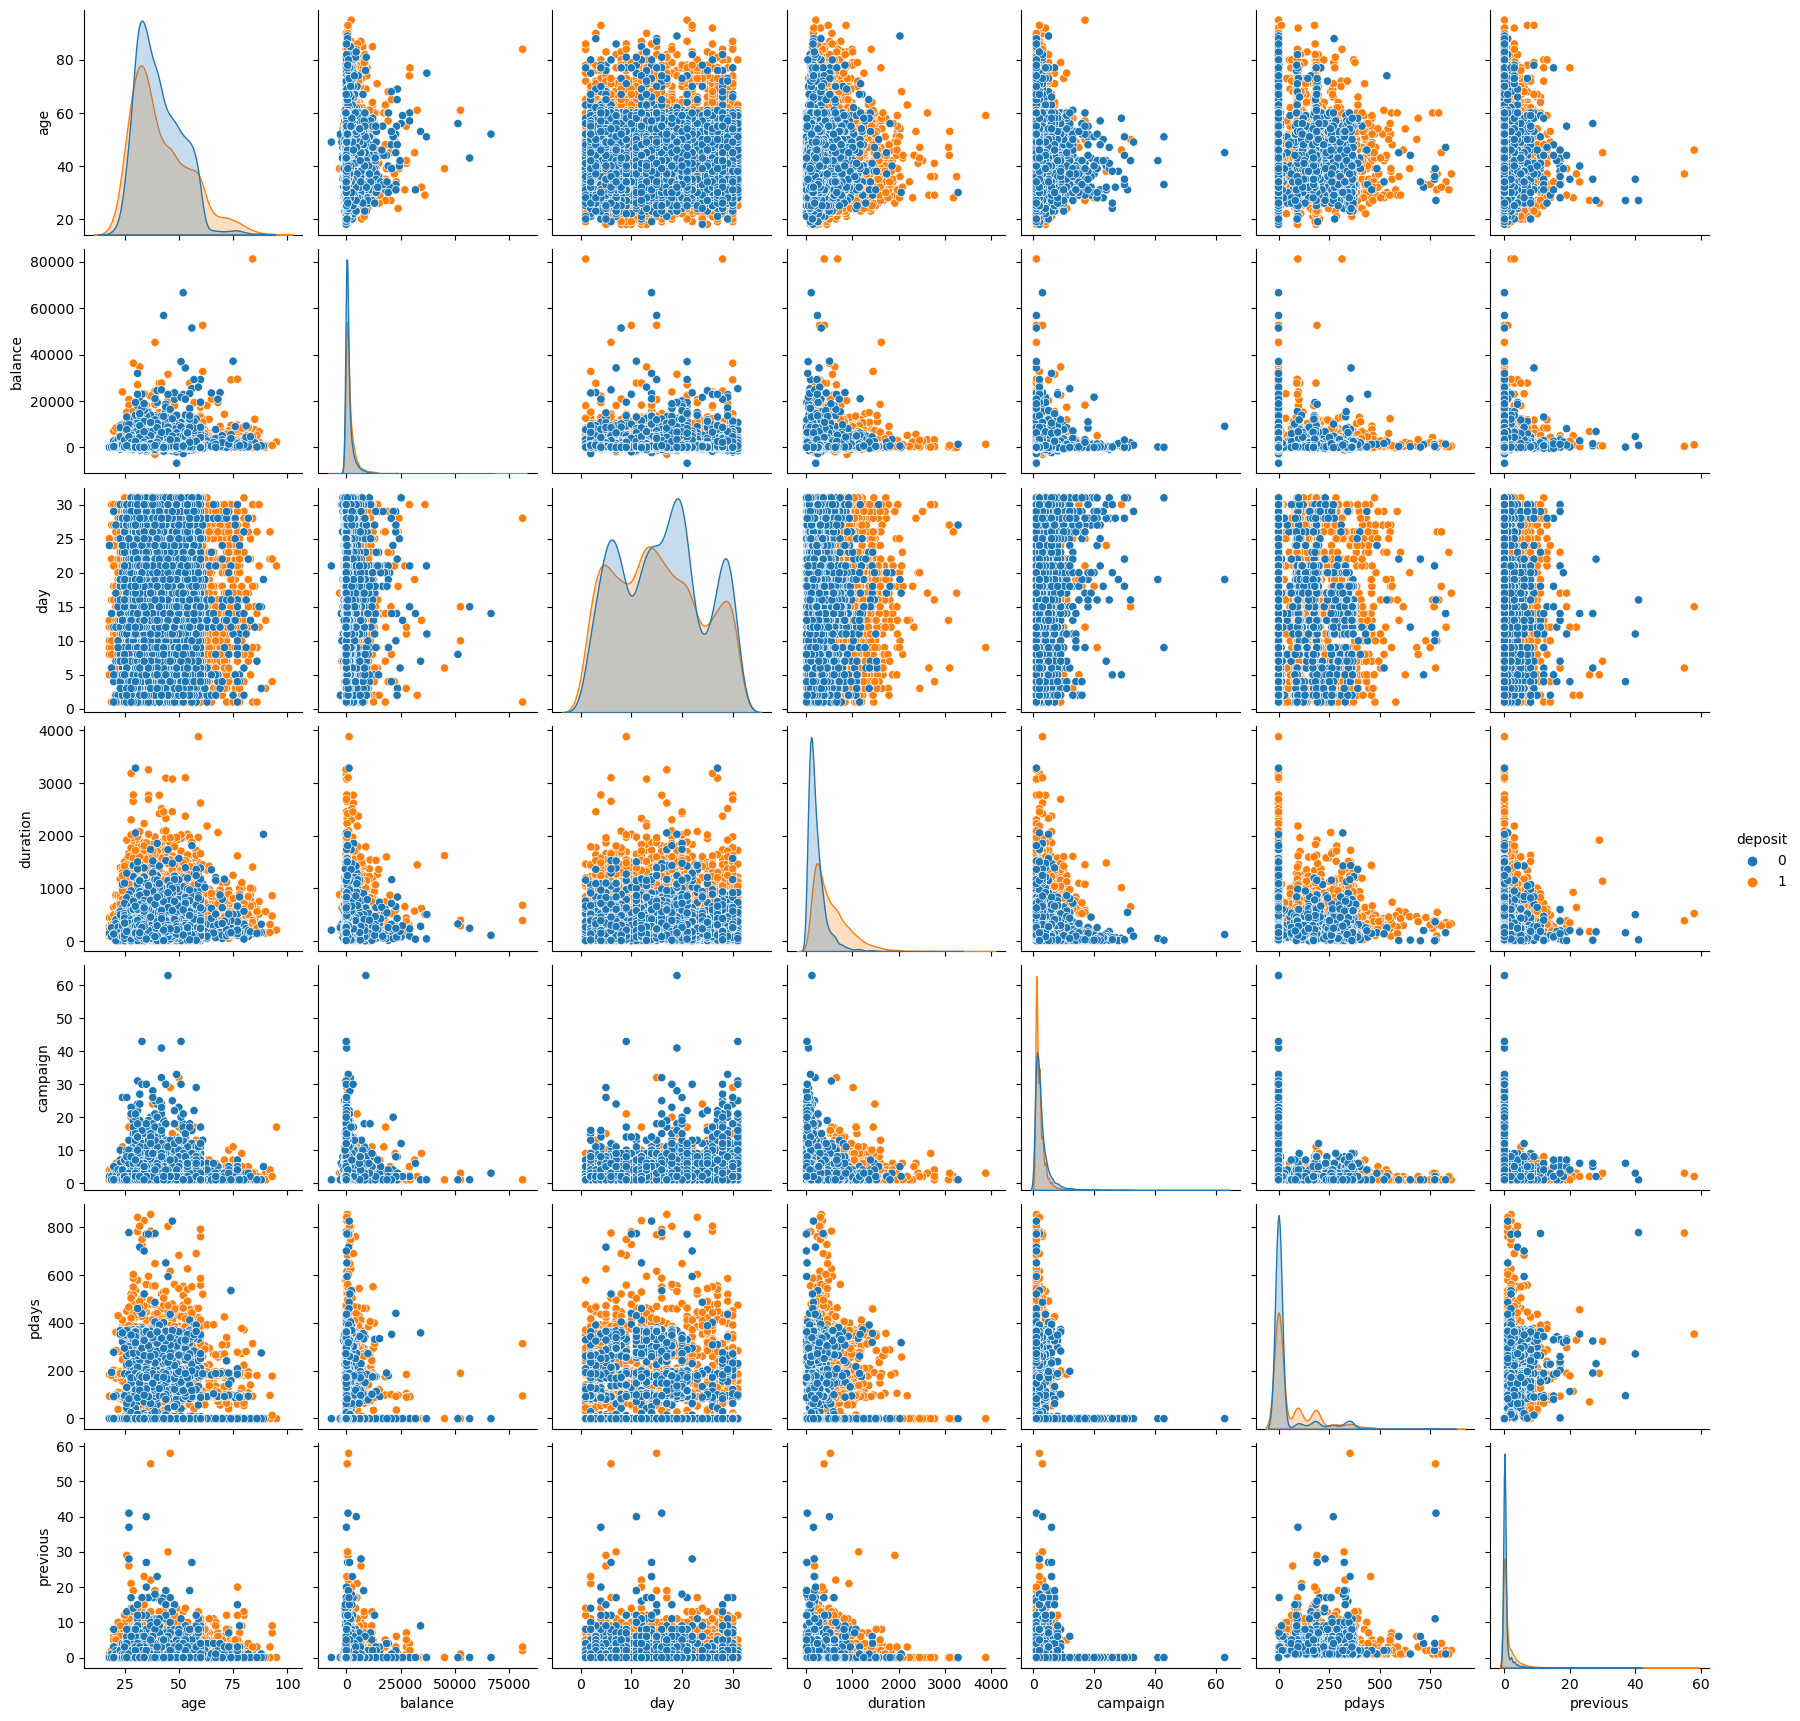

In [11]:
sns.pairplot(data,hue="deposit")

In [12]:
import category_encoders as ce

In [13]:
be=ce.BinaryEncoder()
data_binary=be.fit_transform(data.loc[:,['job','marital', 'education','default', 'housing', 'loan','contact','month','poutcome']])
data_binary.head()

,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,default_0,...,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,poutcome_0,poutcome_1,poutcome_2
0,0,0,0,1,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
3,0,0,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1


In [14]:
data_int=data.select_dtypes(include=['int'])

In [15]:
data_int

,age,balance,day,duration,campaign,pdays,previous,deposit
0,59,2343,5,1042,1,-1,0,1
1,56,45,5,1467,1,-1,0,1
2,41,1270,5,1389,1,-1,0,1
3,55,2476,5,579,1,-1,0,1
4,54,184,5,673,2,-1,0,1
...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0
11158,39,733,16,83,4,-1,0,0
11159,32,29,19,156,2,-1,0,0
11160,43,0,8,9,2,172,5,0


In [18]:
data_deep=pd.concat([data_binary,data_int],axis=1)
data_deep

,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,default_0,...,poutcome_1,poutcome_2,age,balance,day,duration,campaign,pdays,previous,deposit
0,0,0,0,1,0,1,0,0,1,0,...,0,1,59,2343,5,1042,1,-1,0,1
1,0,0,0,1,0,1,0,0,1,0,...,0,1,56,45,5,1467,1,-1,0,1
2,0,0,1,0,0,1,0,0,1,0,...,0,1,41,1270,5,1389,1,-1,0,1
3,0,0,1,1,0,1,0,0,1,0,...,0,1,55,2476,5,579,1,-1,0,1
4,0,0,0,1,0,1,0,1,0,0,...,0,1,54,184,5,673,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,1,1,0,1,0,0,1,1,0,...,0,1,33,1,20,257,1,-1,0,0
11158,0,0,1,1,0,1,0,0,1,0,...,0,1,39,733,16,83,4,-1,0,0
11159,0,0,1,0,1,0,0,0,1,0,...,0,1,32,29,19,156,2,-1,0,0
11160,0,0,1,0,0,1,0,0,1,0,...,1,1,43,0,8,9,2,172,5,0


In [37]:
data_deep.columns

Index(['job_0', 'job_1', 'job_2', 'job_3', 'marital_0', 'marital_1',
       'education_0', 'education_1', 'education_2', 'default_0', 'default_1',
       'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1',
       'month_0', 'month_1', 'month_2', 'month_3', 'poutcome_0', 'poutcome_1',
       'poutcome_2', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit'],
      dtype='object')

In [32]:
x=data_deep.drop("deposit",axis=1)
y=data_deep["deposit"]

In [47]:
from tensorflow.keras.utils import to_categorical

# Convert the mapped Series to a NumPy array
y_array = y.to_numpy()

# One-hot encode the labels
y = to_categorical(y_array, num_classes=2)

In [48]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [62]:
from tensorflow import keras
from keras.models import Sequential
from keras .layers import Dense,Dropout
from keras.optimizers import Adam,RMSprop
from keras.metrics import Accuracy

In [49]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=42)


In [50]:
from sklearn.preprocessing import StandardScaler,normalize
scaler=StandardScaler()

x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=['job_0', 'job_1', 'job_2', 'job_3', 'marital_0', 'marital_1',
       'education_0', 'education_1', 'education_2', 'default_0', 'default_1',
       'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1',
       'month_0', 'month_1', 'month_2', 'month_3', 'poutcome_0', 'poutcome_1',
       'poutcome_2', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'])
x

,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,default_0,...,poutcome_0,poutcome_1,poutcome_2,age,balance,day,duration,campaign,pdays,previous
0,-0.3844,-1.079091,-0.989484,1.319785,-0.870355,0.678403,-0.215873,-0.932064,0.774634,-0.123617,...,-0.325782,-0.433389,0.410252,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260
1,-0.3844,-1.079091,-0.989484,1.319785,-0.870355,0.678403,-0.215873,-0.932064,0.774634,-0.123617,...,-0.325782,-0.433389,0.410252,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260
2,-0.3844,-1.079091,1.010628,-0.757699,-0.870355,0.678403,-0.215873,-0.932064,0.774634,-0.123617,...,-0.325782,-0.433389,0.410252,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260
3,-0.3844,-1.079091,1.010628,1.319785,-0.870355,0.678403,-0.215873,-0.932064,0.774634,-0.123617,...,-0.325782,-0.433389,0.410252,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260
4,-0.3844,-1.079091,-0.989484,1.319785,-0.870355,0.678403,-0.215873,1.072888,-1.290933,-0.123617,...,-0.325782,-0.433389,0.410252,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.3844,0.926706,1.010628,-0.757699,1.148956,-1.474051,-0.215873,1.072888,0.774634,-0.123617,...,-0.325782,-0.433389,0.410252,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260
11158,-0.3844,-1.079091,1.010628,1.319785,-0.870355,0.678403,-0.215873,-0.932064,0.774634,-0.123617,...,-0.325782,-0.433389,0.410252,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260
11159,-0.3844,-1.079091,1.010628,-0.757699,1.148956,-1.474051,-0.215873,-0.932064,0.774634,-0.123617,...,-0.325782,-0.433389,0.410252,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260
11160,-0.3844,-1.079091,1.010628,-0.757699,-0.870355,0.678403,-0.215873,-0.932064,0.774634,-0.123617,...,-0.325782,2.307397,0.410252,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332


In [40]:
x.shape

(11162, 31)

In [71]:
model=Sequential()
model.add(Dense(64,input_shape=(31,),activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [72]:
model.compile(optimizer=Adam(),loss="mse",metrics=["accuracy"])

In [74]:
from keras.callbacks import EarlyStopping
history=model.fit(x_train,y_train,batch_size=10,epochs=20,validation_data=(x_validation,y_validation),verbose=2)

Epoch 1/20
599/599 - 1s - 2ms/step - accuracy: 0.8589 - loss: 0.1097 - val_accuracy: 0.8556 - val_loss: 0.1087
Epoch 2/20
599/599 - 1s - 2ms/step - accuracy: 0.8537 - loss: 0.1101 - val_accuracy: 0.8590 - val_loss: 0.1080
Epoch 3/20
599/599 - 1s - 2ms/step - accuracy: 0.8582 - loss: 0.1072 - val_accuracy: 0.8556 - val_loss: 0.1086
Epoch 4/20
599/599 - 1s - 2ms/step - accuracy: 0.8591 - loss: 0.1076 - val_accuracy: 0.8549 - val_loss: 0.1088
Epoch 5/20
599/599 - 1s - 2ms/step - accuracy: 0.8658 - loss: 0.1044 - val_accuracy: 0.8529 - val_loss: 0.1094
Epoch 6/20
599/599 - 1s - 2ms/step - accuracy: 0.8614 - loss: 0.1084 - val_accuracy: 0.8603 - val_loss: 0.1093
Epoch 7/20
599/599 - 1s - 2ms/step - accuracy: 0.8601 - loss: 0.1067 - val_accuracy: 0.8603 - val_loss: 0.1070
Epoch 8/20
599/599 - 1s - 2ms/step - accuracy: 0.8619 - loss: 0.1057 - val_accuracy: 0.8570 - val_loss: 0.1102
Epoch 9/20
599/599 - 1s - 2ms/step - accuracy: 0.8641 - loss: 0.1059 - val_accuracy: 0.8570 - val_loss: 0.1083
E

In [91]:
print("Average accuracy",sum(history.history["accuracy"])/20)
print("Average loss",sum(history.history["loss"])/20)

Average accuracy 0.8628635942935944
Average loss 0.1049544170498848


In [92]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test accuracy",round(score[1],2))
print("Test loss",round(score[0],2))

Test accuracy 0.85
Test loss 0.11
